In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.image as mpimg
from keras.applications.vgg16 import VGG16
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

# Import Densenet from Keras
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

In [ ]:
trdata = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    #width_shift_range = 0.2,
    #height_shift_range = 0.2,
    #shear_range = 0.2,
    #zoom_range = 0.2,
    #horizontal_flip = True,
    #fill_mode= 'nearest',

)
traindata = trdata.flow_from_directory('/content/drive/Shareddrives/Thenerdone/ChexPert - Covid 3k+/Train2',
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode='categorical',
                                       shuffle=True,
                                    )
tsdata = ImageDataGenerator(rescale=1./255)
testdata = tsdata.flow_from_directory('/content/drive/Shareddrives/Thenerdone/ChexPert - Covid 3k+/Test2',
                                      target_size=(224,224),
                                      batch_size=32,
                                      class_mode='categorical',
                                      shuffle=False,
                                    )

Found 7937 images belonging to 3 classes.
Found 2100 images belonging to 3 classes.


In [ ]:
traindata.class_indices

{'Covid': 0, 'Normal': 1, 'Pneumonia': 2}

In [ ]:
testdata.class_indices

{'Covid': 0, 'Normal': 1, 'Pneumonia': 2}

In [ ]:
# Create the base pre-trained model
base_model = DenseNet121(weights='/content/drive/Shareddrives/Thenerdone/Weights Coursera/Coursera.hdf5', include_top=False)

In [ ]:
# Print the model summary
base_model.summary()

In [ ]:
base_model.trainable = False

In [ ]:
x = base_model.output
x

<KerasTensor: shape=(None, None, None, 1024) dtype=float32 (created by layer 'relu')>

In [ ]:
# Add a global spatial average pooling layer
x_pool = GlobalAveragePooling2D()(x)
x_pool

<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
predictions = Dense(3, activation="softmax")(x_pool)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])
# (You'll customize the loss function in the assignment!)

In [ ]:
model.summary()

In [ ]:
hist = model.fit(
    traindata,
    #steps_per_epoch=8,
    epochs=17,
    validation_data=testdata,
    #validation_steps=2,
    #callbacks = [learning_rate_reduction]
)

Epoch 1/17
249/249 [==============================] - 710s 3s/step - loss: 0.2879 - accuracy: 0.9097 - val_loss: 0.1812 - val_accuracy: 0.9381
Epoch 2/17
249/249 [==============================] - 168s 672ms/step - loss: 0.1022 - accuracy: 0.9763 - val_loss: 0.1088 - val_accuracy: 0.9662
Epoch 3/17
249/249 [==============================] - 166s 666ms/step - loss: 0.0729 - accuracy: 0.9807 - val_loss: 0.1257 - val_accuracy: 0.9538
Epoch 4/17
249/249 [==============================] - 166s 666ms/step - loss: 0.0580 - accuracy: 0.9858 - val_loss: 0.1023 - val_accuracy: 0.9648
Epoch 5/17
249/249 [==============================] - 164s 660ms/step - loss: 0.0490 - accuracy: 0.9864 - val_loss: 0.0926 - val_accuracy: 0.9705
Epoch 6/17
249/249 [==============================] - 166s 665ms/step - loss: 0.0424 - accuracy: 0.9879 - val_loss: 0.0686 - val_accuracy: 0.9776
Epoch 7/17
249/249 [==============================] - 165s 664ms/step - loss: 0.0380 - accuracy: 0.9907 - val_loss: 0.1030 - va

In [ ]:
model.evaluate(traindata)

249/249 [==============================] - 143s 573ms/step - loss: 0.0211 - accuracy: 0.9946


[0.02110319398343563, 0.9945823550224304]

In [ ]:
model.evaluate(testdata)

66/66 [==============================] - 19s 287ms/step - loss: 0.0846 - accuracy: 0.9648


[0.08456692099571228, 0.9647619128227234]

In [ ]:
p = model.predict(testdata)

In [ ]:
pred_classes = np.argmax(p, axis=1)

In [ ]:
pred_classes

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
true_classes = testdata.classes

In [ ]:
true_classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
cm = confusion_matrix(true_classes,pred_classes)
cm

array([[642,   8,  50],
       [  0, 684,  16],
       [  0,   0, 700]])

In [ ]:
cmn=cm/cm.astype(np.float).sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
labels=['Covid-19','Normal','Pneumonia']

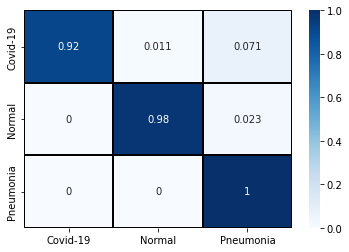

In [ ]:
sns.heatmap(cmn,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels)

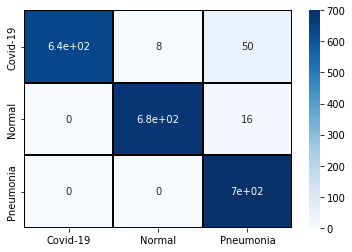

In [ ]:
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels)

In [ ]:
print(classification_report(true_classes,pred_classes, target_names = ['Covid-19 (Class 0)' ,'Normal (Class 1)','Pneumonia (Class 2']))

                    precision    recall  f1-score   support

Covid-19 (Class 0)       1.00      0.92      0.96       700
  Normal (Class 1)       0.99      0.98      0.98       700
Pneumonia (Class 2       0.91      1.00      0.95       700

          accuracy                           0.96      2100
         macro avg       0.97      0.96      0.96      2100
      weighted avg       0.97      0.96      0.96      2100



In [ ]:

model.save("/content/drive/Shareddrives/Thenerdone/Models/DenseNet ChexPert Paul_Norm Covid-3k Good.md5")

INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Thenerdone/Models/DenseNet ChexPert Paul_Norm Covid-3k Good.md5/assets


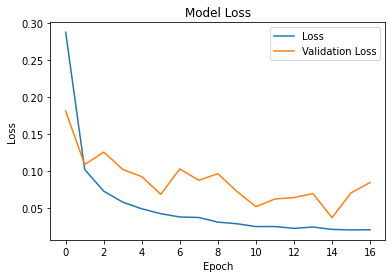

In [ ]:
#plt.plot(M.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss','Validation Loss'])
plt.show()

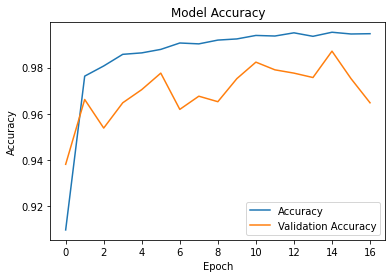

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy'])
plt.show()